# Dummy Variable Input

In [20]:
import numpy as np
import matplotlib.pyplot as plt

N = 10  # 10 Samples
D = 3   # 3 Features

# y = w0 + w1*x1 + w2*x2

X = np.zeros((N, D))
X[:, 0] = 1
X[5:, 1] = 1
X[5:, 2] = 1

print("Martrix X: X0, X1, X2")
print(X)

Martrix X: X0, X1, X2
[[1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 1. 1.]
 [1. 1. 1.]
 [1. 1. 1.]
 [1. 1. 1.]
 [1. 1. 1.]]


In [21]:
Y = np.array([0]*5 + [1]*5)
print("\nVektor Y:")
print(Y)


Vektor Y:
[0 0 0 0 0 1 1 1 1 1]


In [22]:
w_analytical = np.linalg.solve(X.T.dot(X), X.T.dot(Y))
print("\nWeights (w) analitical method:")
print(w_analytical)

LinAlgError: Singular matrix

#### Why Analytical Solution Fails
##### The analytical solution (Normal Equation) fails here because your $\mathbf{X}$ matrix contains linearly dependent columns (specifically, $\mathbf{X}_{:,1}$ and $\mathbf{X}_{:,2}$ are identical).

##### This perfect collinearity makes the matrix $\mathbf{X}^T \mathbf{X}$ singular (non-invertible), meaning there is no unique set of weights $\mathbf{w}$ that minimizes the Mean Squared Error (MSE). The Gradient Descent method, on the other hand, is an iterative optimization process that doesn't require matrix inversion, allowing it to converge to one of the multiple valid solutions that exist in the weight space, providing a stable, albeit non-unique, result.

##### The analytical calculation fails precisely at the step of finding the inverse of the $\mathbf{X}^T \mathbf{X}$ matrix, as the perfect collinearity of the dummy variables makes its determinant zero, rendering it non-invertible (a singular matrix).

##### This issue of lacking a unique solution is especially common when the input data are of the dummy (0, 1) type and lead to perfect dependency between features.

In [23]:
costs = []  # The list to store values of error value

w = np.random.randn(D) / np.sqrt(D)  # Random initialization of weights
learning_rate = 0.001

# Loop of gradient descent
for t in range(1000):

    Yhat = X.dot(w)

    # Calulating error (delta)
    delta = Yhat - Y

    # Weight update
    w = w - learning_rate * X.T.dot(delta)

    # Mean Squared Error (MSE)
    mse = delta.dot(delta) / N
    costs.append(mse)

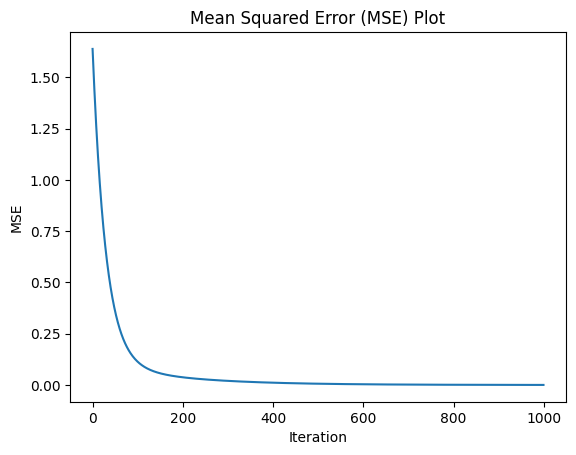


Updated weights (w) after gradient descent step:
[0.02369392 0.37430803 0.59218364]


In [24]:
# Loss visualization
plt.plot(costs)
plt.title("Mean Squared Error (MSE) Plot")
plt.xlabel("Iteration")
plt.ylabel("MSE")
plt.show()

print("\nUpdated weights (w) after gradient descent step:")
print(w)
